## APS PYTHON PARA CIÊNCIA DE DADOS
Alexandre Wever

Arthur Tamm

Tomás Alessi

Victória de Oliveira Farias


Base de dados : Adult Census Income

Link : https://www.kaggle.com/datasets/uciml/adult-census-income 

O conjunto de dados escolhido para analise é o **Adult Census Income**, amplamente utilizado em estudos e competições de aprendizado de máquina. Ele contém informações demográficas e ocupacionais de adultos nos Estados Unidos, extraídas do Censo de 1994. Cada registro representa um indivíduo, com variáveis como idade, escolaridade, ocupação, horas trabalhadas por semana e outras características socioeconômicas.  

O objetivo principal da análise é **compreender os fatores que influenciam a faixa de renda** de um indivíduo, buscando identificar padrões e relações entre as variáveis. O relatório será desenvolvido integrando explicações teóricas, código executável, visualizações e interpretações. 

In [1]:
import pandas as pd
import numpy as np
from plotnine import *
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)


In [2]:
df = pd.read_csv("adult.csv")
print(df.shape[0], "linhas e", df.shape[1], "colunas")
df.head()

32561 linhas e 15 colunas


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


O dataset contém informações demográficas e de emprego de adultos nos EUA, com o objetivo de prever se o indivíduo ganha mais de 50 mil dólares anuais (income).

Principais colunas:

age – idade

workclass – tipo de emprego

education – nível de escolaridade

marital-status – estado civil

occupation – ocupação

relationship – relação familiar

race, sex – dados demográficos

hours-per-week – horas trabalhadas por semana

native-country – país de origem

income – variável alvo (<=50K ou >50K)

In [4]:
df.describe(include='all')

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [5]:
df.isna().sum()
# Verificacao de valores nulos

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [6]:
df.replace('?', np.nan, inplace=True)
df.isna().sum()
# substitui valores '?' por nulos e refaz a contagem


age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [7]:
df.groupby('income').agg({'age':['mean'], 'hours.per.week':['mean'], 'education.num':['mean']})

,age,hours.per.week,education.num
,mean,mean,mean
income,,,
<=50K,36.783738,38.840210,9.595065
>50K,44.249841,45.473026,11.611657


Realizando um agrupamento por faixa de renda, podemos observar as médias de idade, horas trabalhadas por semana e nível educacional para cada categoria de renda (separação feita entre mais de 50 mil dólares e 50 mil dólares ou menos). Observa-se que indivíduos com renda superior a 50 mil dólares tendem a ser mais velhos, trabalhar mais horas por semana e possuir um nível educacional mais elevado em comparação com aqueles que ganham 50 mil dólares ou menos.

In [8]:
df.groupby(['income', 'race']).size().reset_index(name='count')


,income,race,count
0,<=50K,Amer-Indian-Eskimo,275
1,<=50K,Asian-Pac-Islander,763
2,<=50K,Black,2737
3,<=50K,Other,246
4,<=50K,White,20699
5,>50K,Amer-Indian-Eskimo,36
6,>50K,Asian-Pac-Islander,276
7,>50K,Black,387
8,>50K,Other,25
9,>50K,White,7117


In [9]:
df.groupby(['income', 'sex']).size().reset_index(name='count')


,income,sex,count
0,<=50K,Female,9592
1,<=50K,Male,15128
2,>50K,Female,1179
3,>50K,Male,6662


Oberva-se que não há uma discrepância significativa na distribuição de renda variando o sexo, mas há uma diferença notável quando se considera a raça. Indivíduos de determinadas raças apresentam uma maior proporção de renda superior a 50 mil dólares anuais em comparação com outras raças. Essa análise sugere que fatores demográficos, como raça, podem influenciar a distribuição de renda dentro do conjunto de dados.

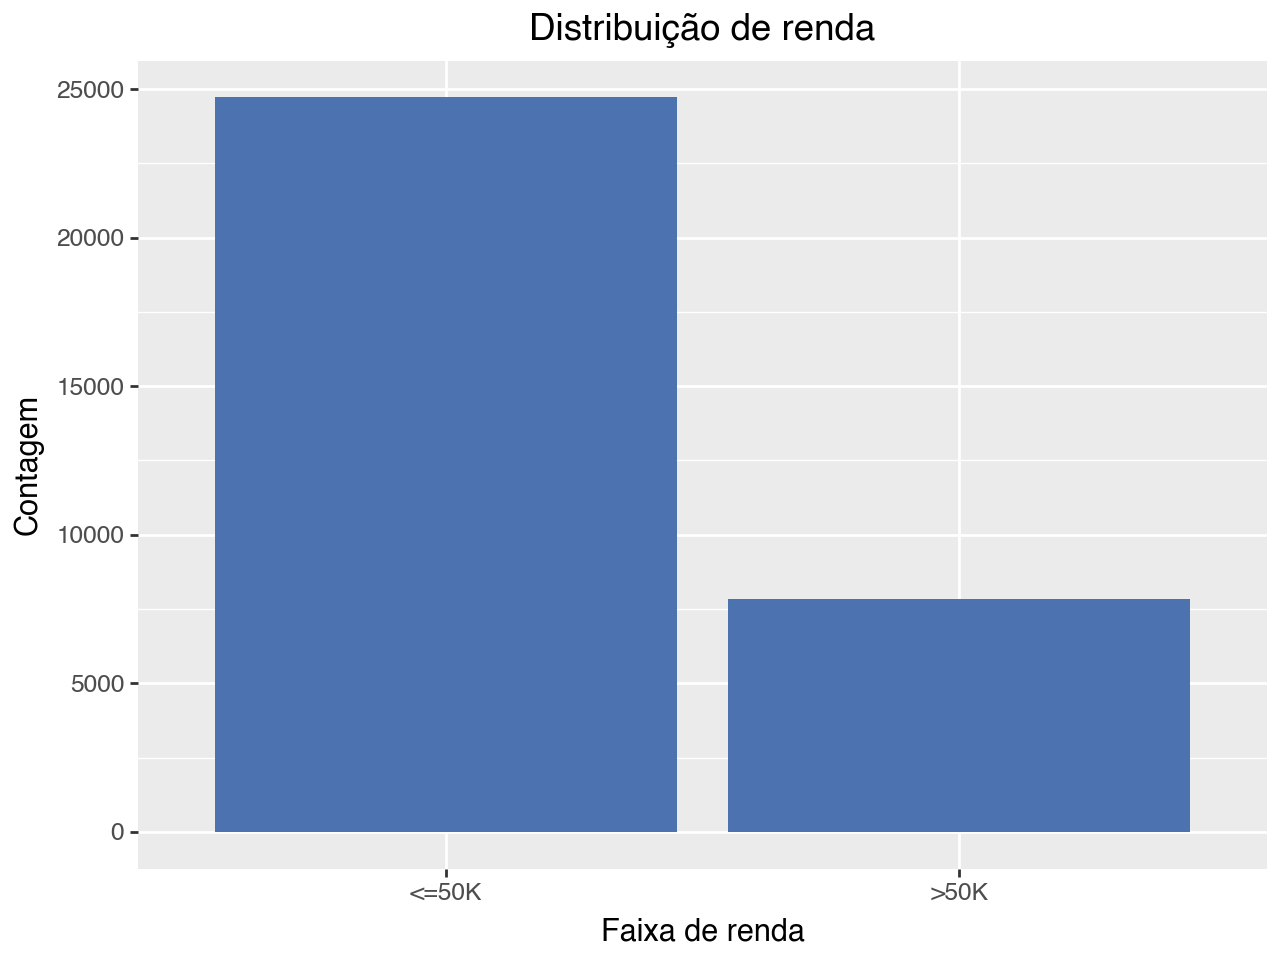

In [10]:
(ggplot(df, aes(x='income')) +
 geom_bar(fill='#4C72B0') +
 labs(title='Distribuição de renda', x='Faixa de renda', y='Contagem'))

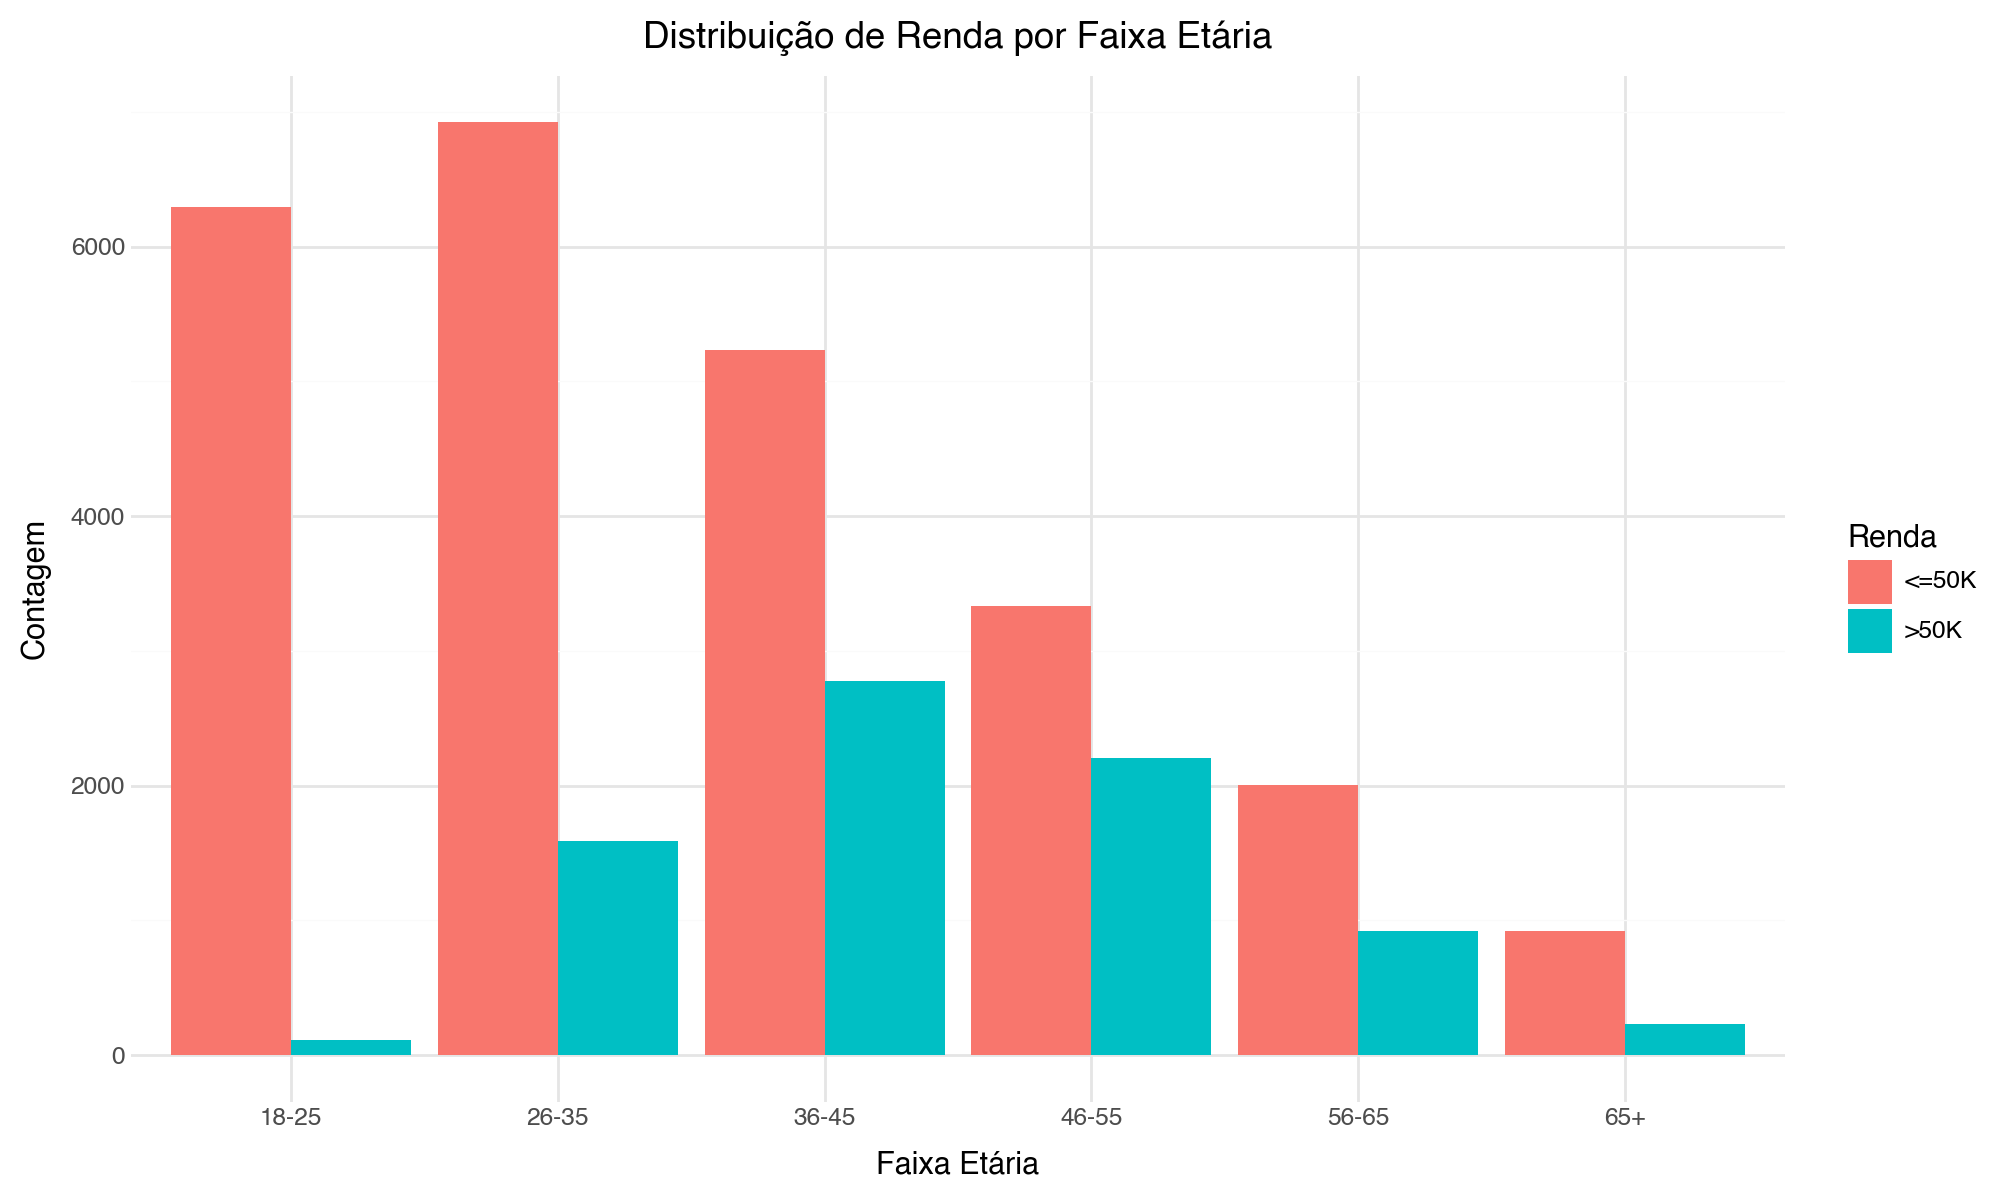

In [ ]:
df['faixa_etaria'] = pd.cut(df['age'], 
                             bins=[0, 25, 35, 45, 55, 65, 100],
                             labels=['18-25', '26-35', '36-45', '46-55', '56-65', '65+'])

 geom_bar(position='dodge') +
 labs(title='Distribuição de Renda por Faixa Etária',
      x='Faixa Etária',
      y='Contagem',
      fill='Renda') +
 theme_minimal() +
 theme(figure_size=(10, 6)))

A partir do primeiro gráfico, observa-se que a maioria dos indivíduos do conjunto de dados pertence à faixa de renda de até 50 mil dólares anuais, o que indica um de classes, comum em dados socioeconômicos.

O segundo gráfico mostra a distribuição da idade em relação à faixa de renda. Nota-se que a concentração de indivíduos é maior entre **25 e 45 anos**, faixa etária em que há predominância de pessoas com renda menor que 50 mil dólares. Entretanto, à medida que a idade aumenta, a proporção de indivíduos com renda superior a 50 mil dólares cresce, alcançando um pico por volta dos **40 a 50 anos**.  

A partir dos 60 anos, observa-se uma queda significativa na contagem de registros, o que pode estar relacionado à aposentadoria ou redução da quantidade de trabalho.  

Essas evidências sugerem que a idade está associada à renda até certo ponto, e que essa relação pode não ser linear.


## Análise Exploratória Aprofundada




### 1. Educação e Renda

A educação é frequentemente citada como um dos fatores mais importantes na determinação da renda. Vamos explorar como diferentes níveis educacionais se relacionam com a faixa de renda.


In [12]:
# Análise da distribuição de renda por nível educacional
education_income = (df
                    .groupby(['education', 'income'])
                    .size()
                    .reset_index(name='count'))

education_income.head(10)


,education,income,count
0,10th,<=50K,871
1,10th,>50K,62
2,11th,<=50K,1115
3,11th,>50K,60
4,12th,<=50K,400
5,12th,>50K,33
6,1st-4th,<=50K,162
7,1st-4th,>50K,6
8,5th-6th,<=50K,317
9,5th-6th,>50K,16


In [24]:
education_rename = {
    'HS-grad': 'Ensino Médio Completo',
    'Assoc-voc': 'Técnico Profissionalizante',
    'Assoc-acdm': 'Técnico Acadêmico',
    'Some-college': 'Superior Incompleto',
    'Bachelors': 'Bacharelado',
    'Masters': 'Mestrado',
    'Doctorate': 'Doutorado',
    'Prof-school': 'Escola Profissional',
    'Preschool': 'Pré-escola',
    '1st-4th': '1ª a 4ª série',
    '5th-6th': '5ª a 6ª série',
    '7th-8th': '7ª a 8ª série',
    '9th': '9º ano',
    '10th': '10º ano (1º EM)',
    '11th': '11º ano (2º EM)',
    '12th': '12º ano (3º EM)'
}

df['education'] = df['education'].replace(education_rename)


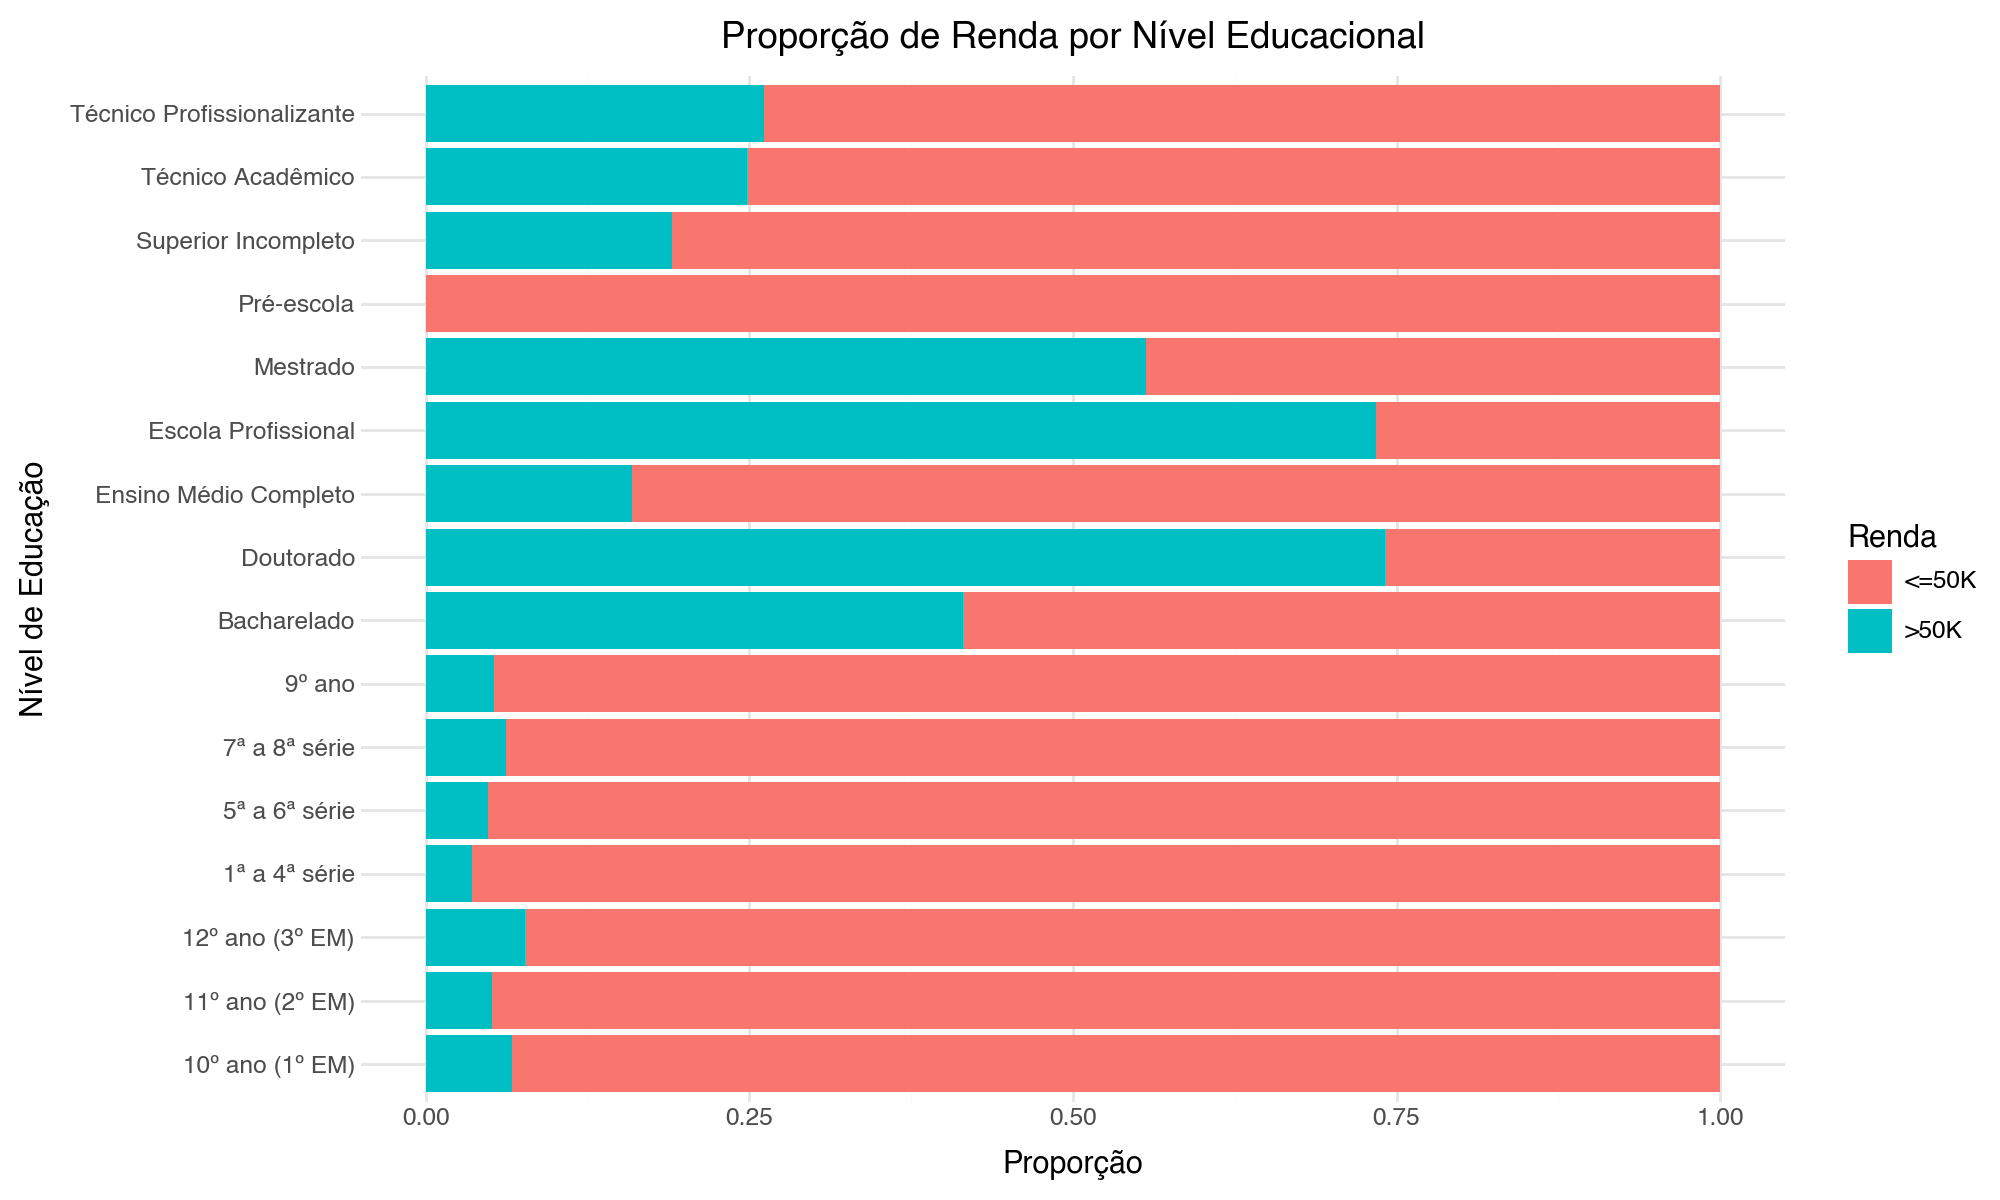

In [25]:
# 

# Gráfico de barras empilhadas mostrando a proporção de renda por educação
(ggplot(df, aes(x='education', fill='income')) +
 geom_bar(position='fill') +
 coord_flip() +
 labs(title='Proporção de Renda por Nível Educacional',
      x='Nível de Educação',
      y='Proporção',
      fill='Renda') +
 theme_minimal() +
 theme(figure_size=(10, 6)))


In [14]:
# Calculando a proporção de alta renda por educação
education_prop = (df
                  .groupby('education')
                  .agg(
                      total=('income', 'count'),
                      high_income=('income', lambda x: (x == '>50K').sum())
                  )
                  .assign(prop_high_income=lambda x: x['high_income'] / x['total'] * 100)
                  .sort_values('prop_high_income', ascending=False)
                  .reset_index())

education_prop


,education,total,high_income,prop_high_income
0,Doctorate,413,306,74.092010
1,Prof-school,576,423,73.437500
2,Masters,1723,959,55.658735
3,Bachelors,5355,2221,41.475257
4,Assoc-voc,1382,361,26.121563
5,Assoc-acdm,1067,265,24.835989
6,Some-college,7291,1387,19.023454
7,HS-grad,10501,1675,15.950862
8,12th,433,33,7.621247
9,10th,933,62,6.645230


**Interpretação:**

O gráfico revela uma **relação clara entre educação e renda**. Indivíduos com nível educacional mais avançado apresentam proporções significativamente maiores de renda superior a 50 mil dólares:

- **Doctorate** e **Prof-school** (profissional/médico/advogado) lideram com as maiores proporções de alta renda, superando 70%
- **Masters** e **Bachelors** também apresentam proporções elevadas, acima de 35-40%
- Por outro lado, níveis educacionais mais básicos como **Preschool**, **1st-4th**, e **Some-HS** (ensino médio incompleto) têm proporções abaixo de 5%

Essa tendência confirma a hipótese de que a educação superior está fortemente associada a melhores oportunidades de renda


### 2. Horas Trabalhadas por Semana

Outro fator importante a ser analisado é a relação entre a quantidade de horas trabalhadas por semana e a faixa de renda. Trabalhadores que dedicam mais horas tendem a ganhar mais?


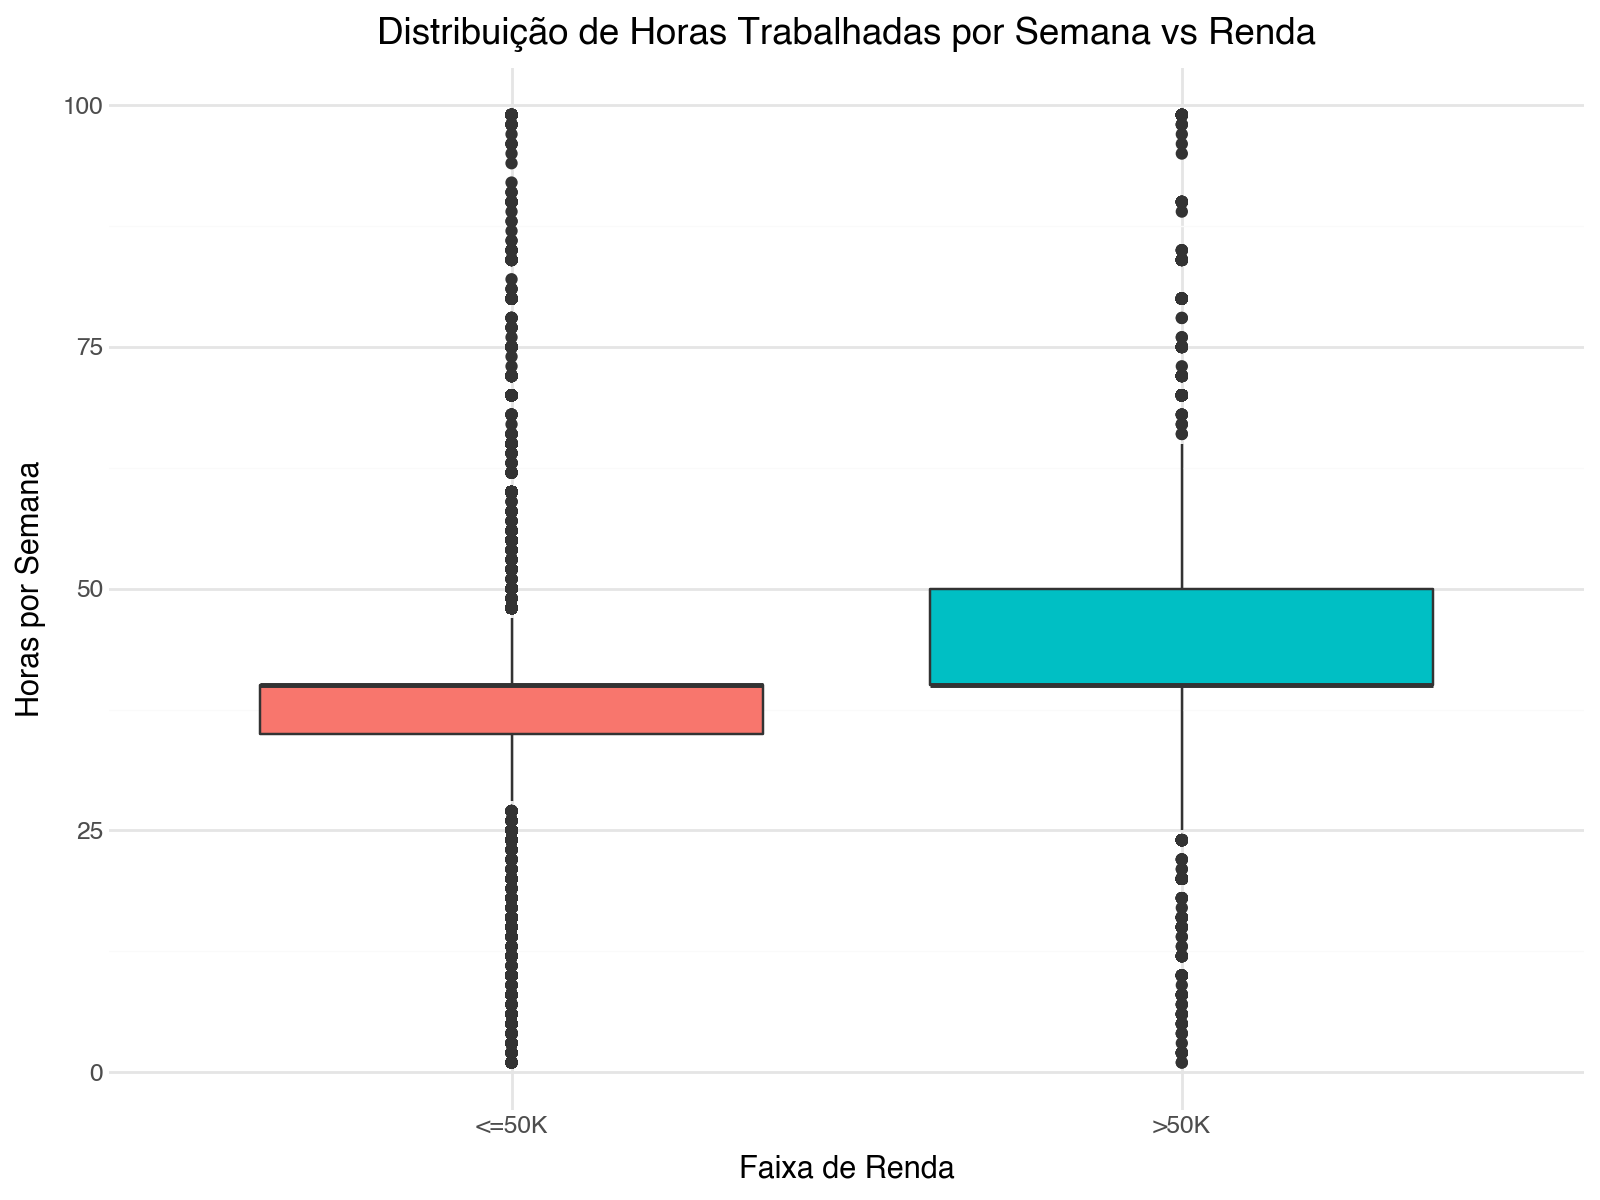

In [15]:
# Boxplot comparando horas trabalhadas entre faixas de renda
(ggplot(df, aes(x='income', y='hours.per.week', fill='income')) +
 geom_boxplot() +
 labs(title='Distribuição de Horas Trabalhadas por Semana vs Renda',
      x='Faixa de Renda',
      y='Horas por Semana') +
 theme_minimal() +
 theme(figure_size=(8, 6), legend_position='none'))


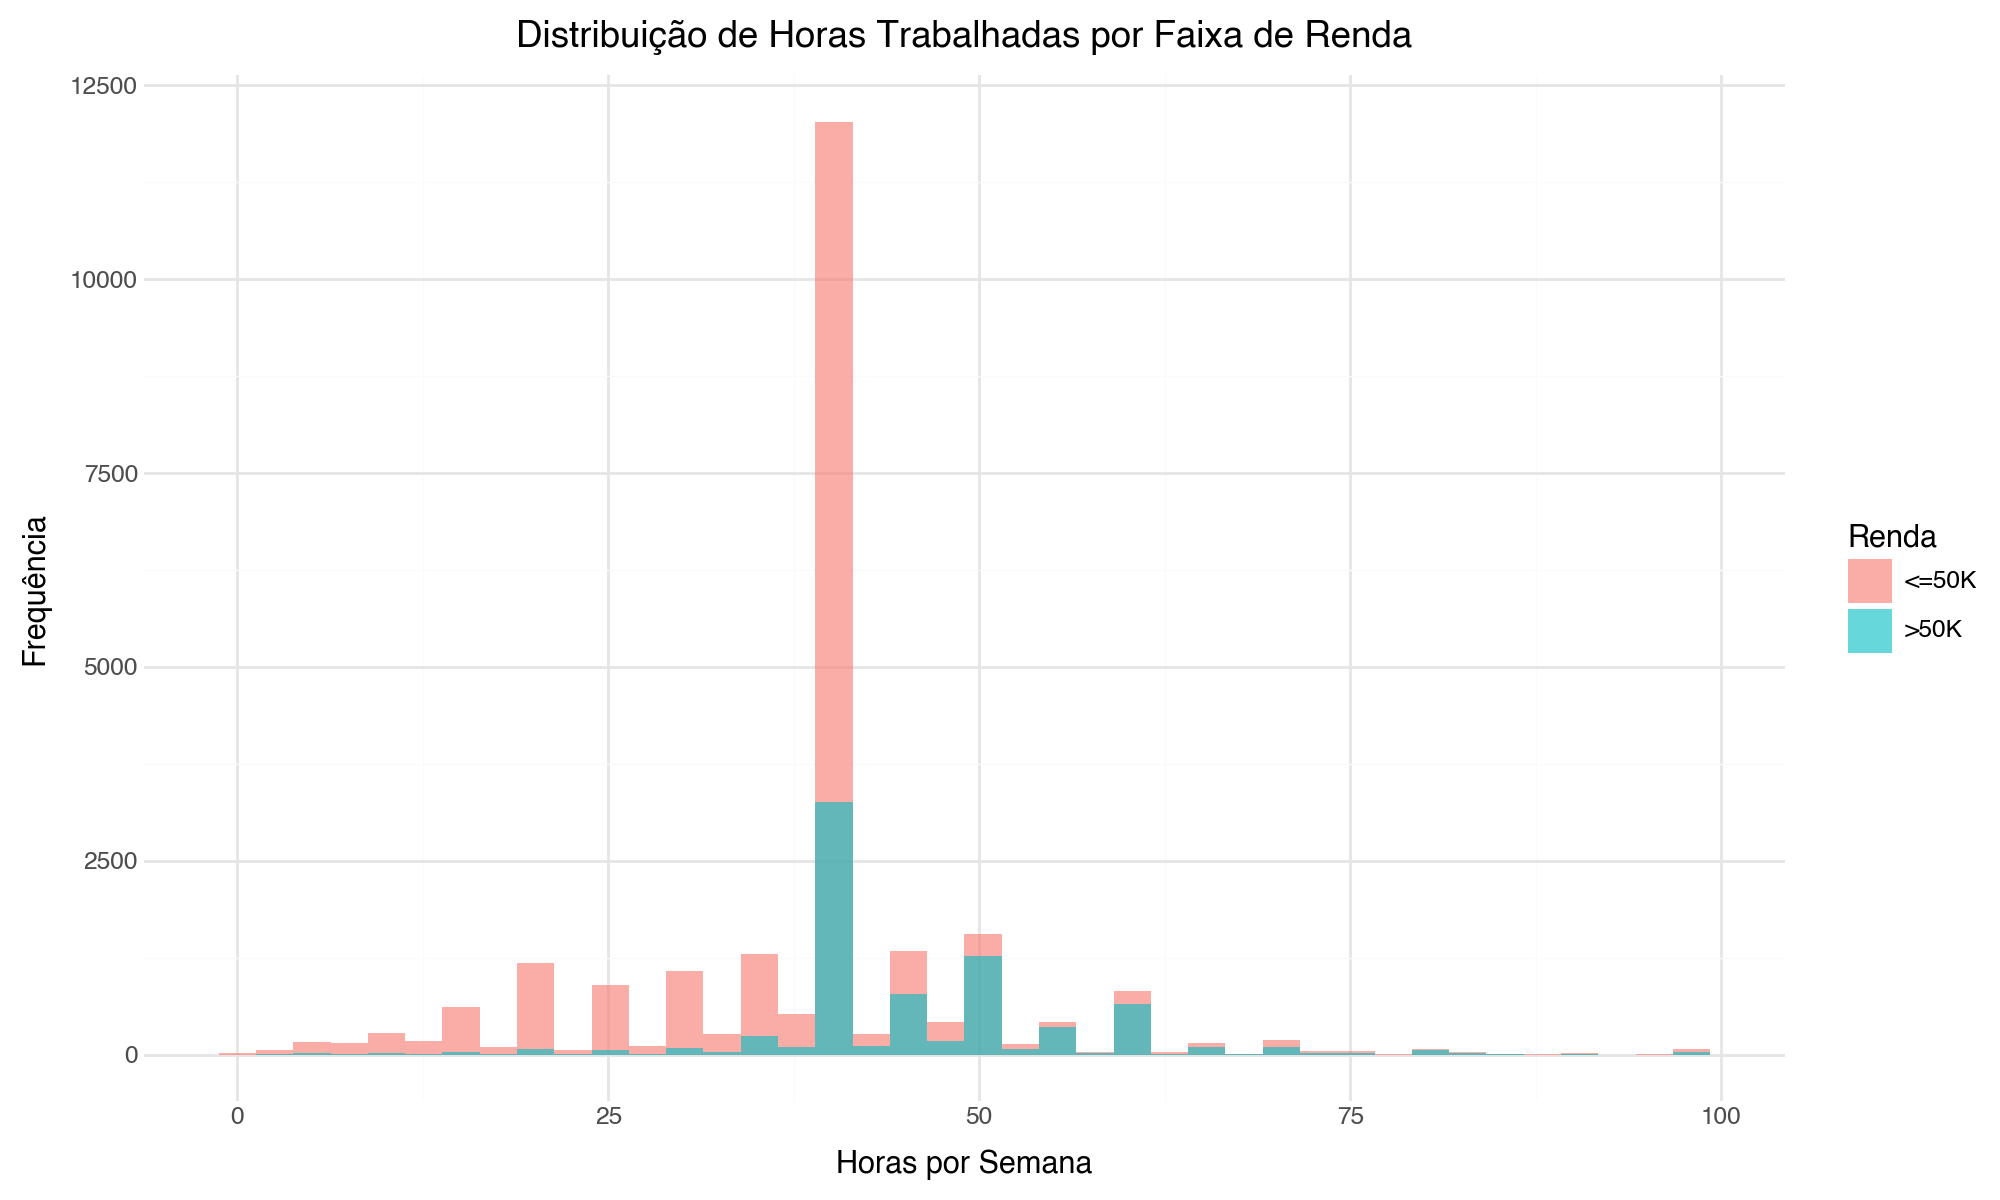

In [16]:
# Histograma sobreposto das horas trabalhadas
(ggplot(df, aes(x='hours.per.week', fill='income')) +
 geom_histogram(alpha=0.6, bins=40, position='identity') +
 labs(title='Distribuição de Horas Trabalhadas por Faixa de Renda',
      x='Horas por Semana',
      y='Frequência',
      fill='Renda') +
 theme_minimal() +
 theme(figure_size=(10, 6)))


In [17]:
# Estatísticas descritivas de horas trabalhadas por renda
df.groupby('income')['hours.per.week'].describe()


,count,mean,std,min,25%,50%,75%,max
income,,,,,,,,
<=50K,24720.0,38.840210,12.318995,1.0,35.0,40.0,40.0,99.0
>50K,7841.0,45.473026,11.012971,1.0,40.0,40.0,50.0,99.0


**Interpretação:**

Os gráficos revelam uma **diferença moderada, mas significativa** nas horas trabalhadas entre as faixas de renda:

- Indivíduos com renda **superior a 50 mil dólares** trabalham em média **45 horas por semana**, enquanto aqueles com renda menor ou igual a 50 mil trabalham cerca de **39 horas por semana**
- Ambas as distribuições apresentam um pico em torno de **40 horas semanais**, que é a carga horária padrão de trabalho em tempo integral
- O boxplot mostra que a faixa de alta renda possui uma mediana ligeiramente maior e uma distribuição com maior concentração acima das 40 horas
- Observa-se também que há indivíduos em ambas as faixas trabalhando valores extremos (menos de 10 horas ou mais de 80 horas por semana)

Isso sugere que, embora horas trabalhadas sejam um fator relevante, **não são o único determinante da renda**


### 3. Estado Civil e Renda

O estado civil pode influenciar a renda de diversas formas, incluindo dupla renda familiar, responsabilidades financeiras e estabilidade. Vamos investigar essa relação.


In [18]:
# Contagem por estado civil e renda
marital_income = (df
                  .groupby(['marital.status', 'income'])
                  .size()
                  .reset_index(name='count'))

marital_income


,marital.status,income,count
0,Divorced,<=50K,3980
1,Divorced,>50K,463
2,Married-AF-spouse,<=50K,13
3,Married-AF-spouse,>50K,10
4,Married-civ-spouse,<=50K,8284
5,Married-civ-spouse,>50K,6692
6,Married-spouse-absent,<=50K,384
7,Married-spouse-absent,>50K,34
8,Never-married,<=50K,10192
9,Never-married,>50K,491


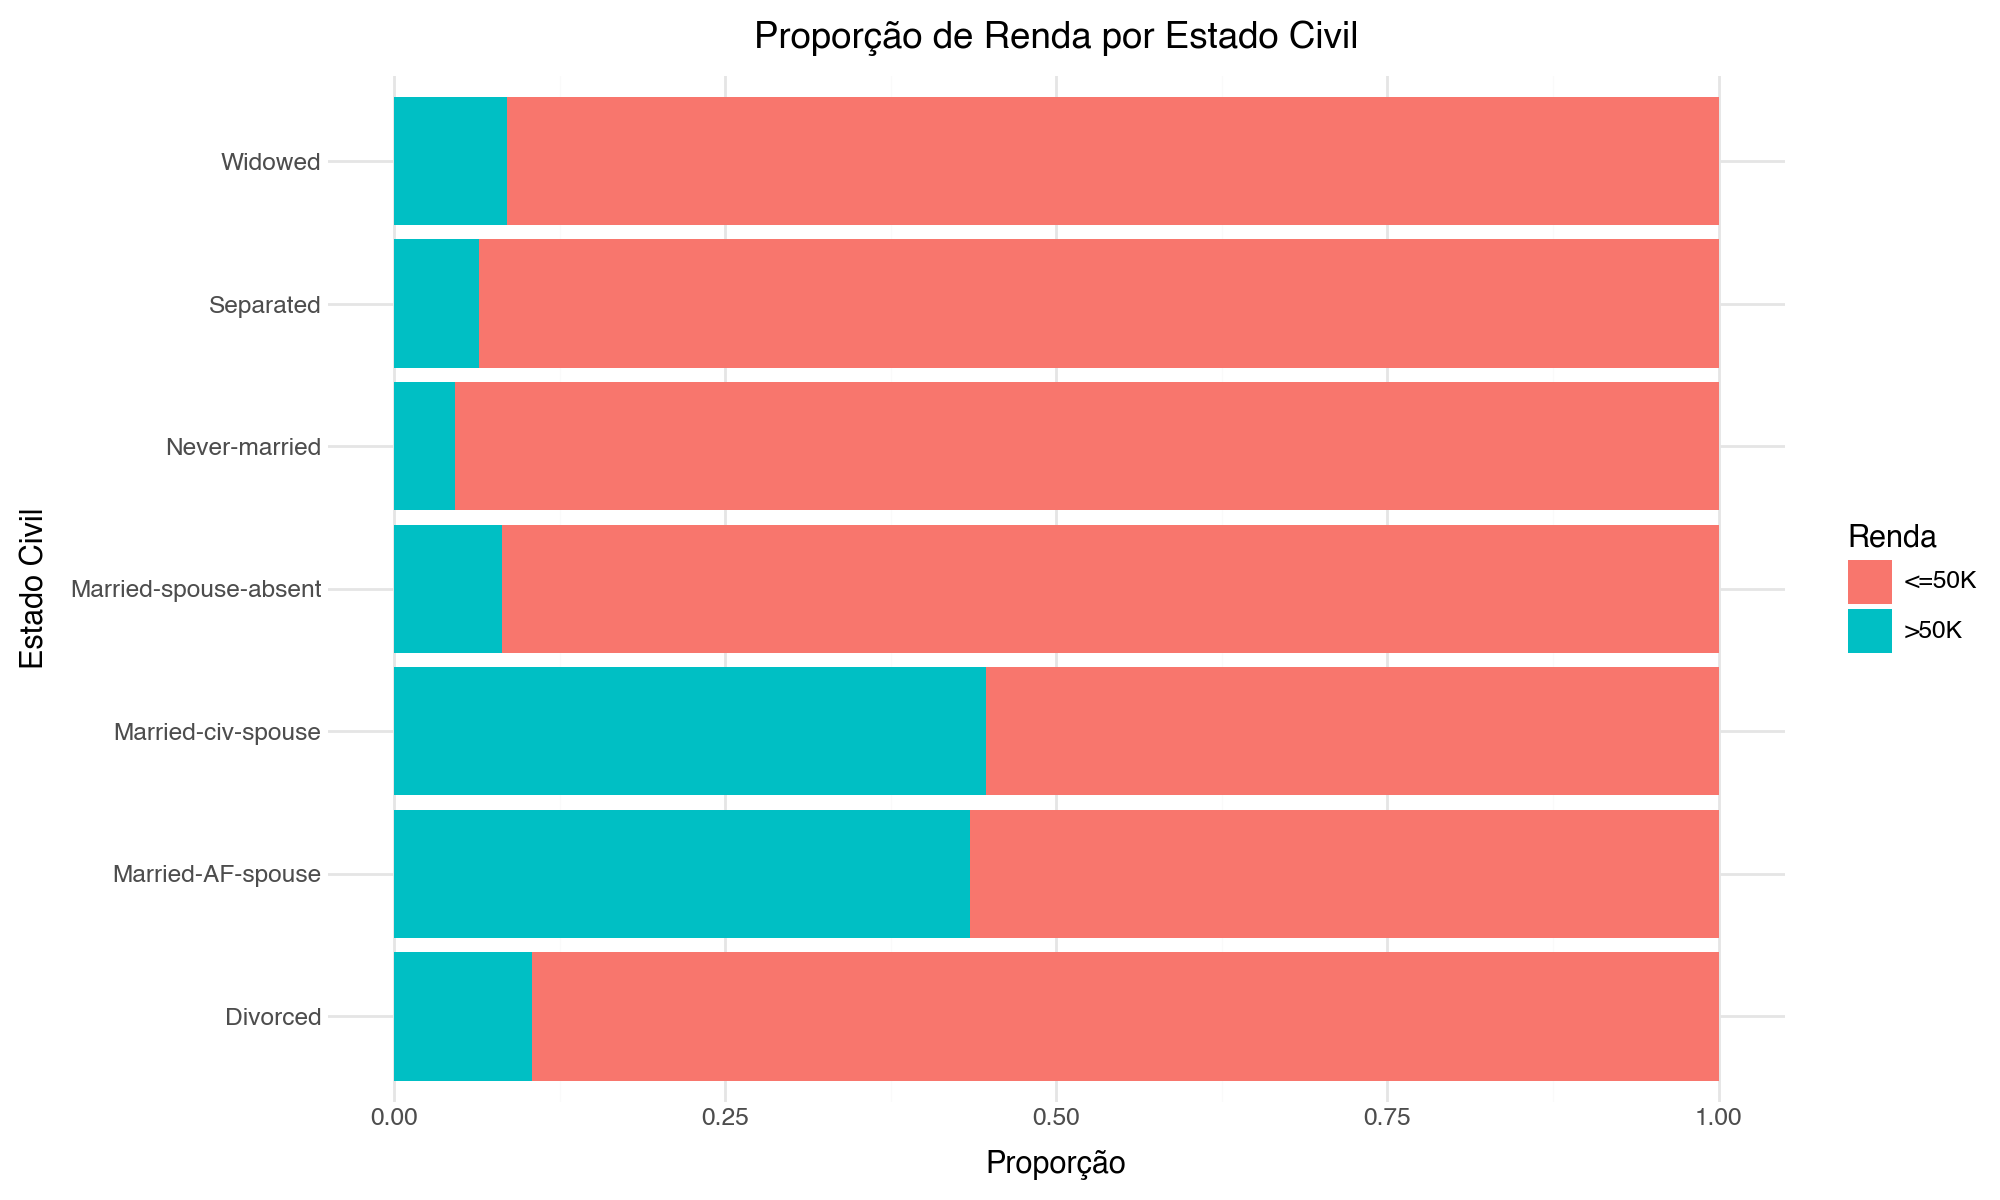

In [19]:
# Gráfico de barras com proporção de renda por estado civil
(ggplot(df, aes(x='marital.status', fill='income')) +
 geom_bar(position='fill') +
 coord_flip() +
 labs(title='Proporção de Renda por Estado Civil',
      x='Estado Civil',
      y='Proporção',
      fill='Renda') +
 theme_minimal() +
 theme(figure_size=(10, 6)))


In [20]:
# Proporção de alta renda por estado civil
marital_prop = (df
                .groupby('marital.status')
                .agg(
                    total=('income', 'count'),
                    high_income=('income', lambda x: (x == '>50K').sum())
                )
                .assign(prop_high_income=lambda x: x['high_income'] / x['total'] * 100)
                .sort_values('prop_high_income', ascending=False)
                .reset_index())

marital_prop


,marital.status,total,high_income,prop_high_income
0,Married-civ-spouse,14976,6692,44.684829
1,Married-AF-spouse,23,10,43.478261
2,Divorced,4443,463,10.420887
3,Widowed,993,85,8.559919
4,Married-spouse-absent,418,34,8.133971
5,Separated,1025,66,6.439024
6,Never-married,10683,491,4.596087


**Interpretação:**

O estado civil mostra uma **forte associação com a renda**, sendo um dos fatores mais discriminantes observados até agora:

- **Married-civ-spouse** (casado com cônjuge civil) apresenta de longe a maior proporção de alta renda, com aproximadamente **44%** dos indivíduos ganhando mais de 50 mil dólares
- **Married-AF-spouse** (casado com cônjuge nas forças armadas) também apresenta altas proporções de com aproximadamente **43%** dos indivíduos ganhando mais de 50 mil dólares

- Essa categoria se destaca significativamente das demais, sugerindo que o casamento está associado a maior poder aquisitivo.

- Estados civis como **Married-spouse-absent** (casado mas cônjuge ausente), **Divorced** (divorciado), **Separated** (separado), **Widowed** (viúvo) e **Never-married** (nunca casou) apresentam proporções consideravelmente menores, entre 4-10%


Esses resultados podem reflem que a possível combinação de renda e **estabilidade financeira e social** associada ao casamento, tende a ter um grande impacto na definição de rendas >=50K


### 4. Ocupação e Renda

A ocupação profissional é intuitivamente um dos fatores mais diretos na determinação da renda. Vamos analisar quais ocupações estão mais associadas a rendas elevadas.


In [21]:
# Calculando proporção de alta renda por ocupação
occupation_prop = (df
                   .groupby('occupation')
                   .agg(
                       total=('income', 'count'),
                       high_income=('income', lambda x: (x == '>50K').sum())
                   )
                   .assign(prop_high_income=lambda x: x['high_income'] / x['total'] * 100)
                   .sort_values('prop_high_income', ascending=False)
                   .reset_index())

occupation_prop


,occupation,total,high_income,prop_high_income
0,Exec-managerial,4066,1968,48.401377
1,Prof-specialty,4140,1859,44.903382
2,Protective-serv,649,211,32.511556
3,Tech-support,928,283,30.495690
4,Sales,3650,983,26.931507
5,Craft-repair,4099,929,22.664064
6,Transport-moving,1597,320,20.037570
7,Adm-clerical,3770,507,13.448276
8,Machine-op-inspct,2002,250,12.487512
9,Farming-fishing,994,115,11.569416


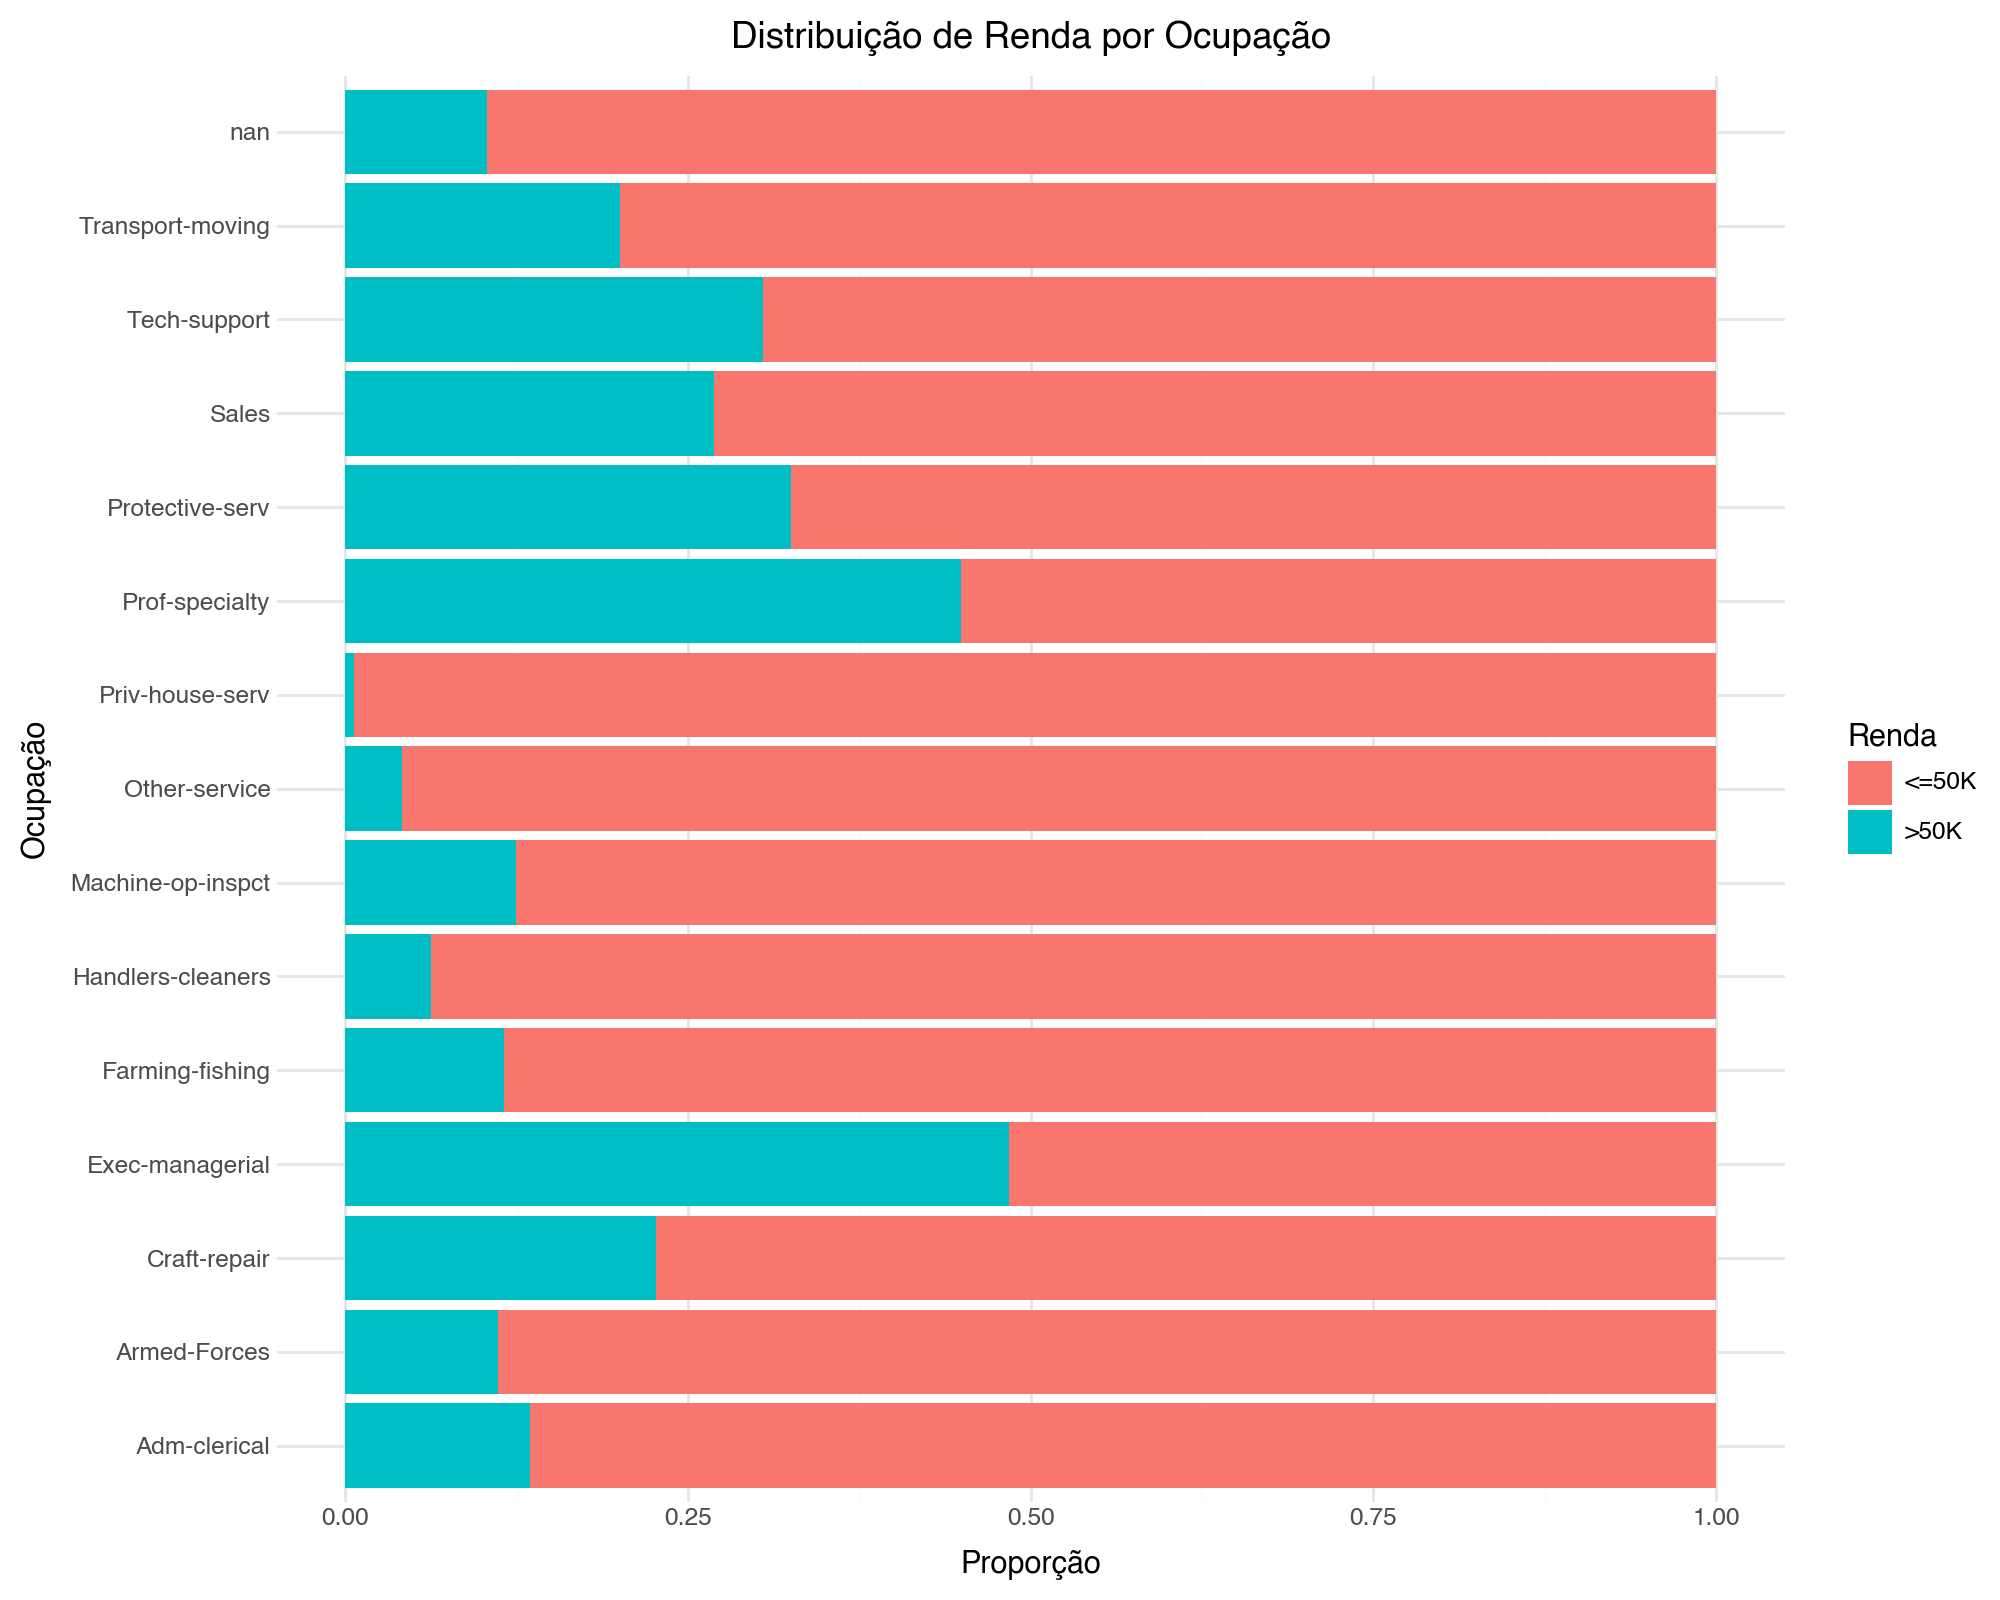

In [23]:
# Gráfico mostrando volume e proporção
(ggplot(df, aes(x='occupation', fill='income')) +
 geom_bar(position='fill') +
 coord_flip() +
 labs(title='Distribuição de Renda por Ocupação',
      x='Ocupação',
      y='Proporção',
      fill='Renda') +
 theme_minimal() +
 theme(figure_size=(10, 8)))


**Interpretação:**

A ocupação mostra **variações dramáticas** na proporção de alta renda, confirmando sua importância como fator determinante:

**Ocupações de alta renda (>40%):**
- **Exec-managerial** (executivos/gerentes) lidera com cerca de 50% de alta renda
- **Prof-specialty** (profissionais especializados) segue com aproximadamente 44%
- Essas ocupações normalmente exigem educação superior e habilidades especializadas

**Ocupações de renda intermediária (20-30%):**
- **Tech-support** (suporte técnico), **Sales** (vendas), **Protective-serv** (serviços de proteção)
- Ocupações que podem exigir treinamento técnico ou especialização moderada

**Ocupações de baixa renda (<15%):**
- **Priv-house-serv** (serviços domésticos privados) tem a menor proporção, praticamente 0%
- **Other-service** (outros serviços), **Handlers-cleaners** (manipuladores/limpeza), **Farming-fishing** (agricultura/pesca)
- Essas ocupações geralmente não requerem educação formal avançada e tendem a ter salários mais baixos

A disparidade observada reflete a estrutura do mercado de trabalho, onde ocupações que exigem maior qualificação e responsabilidade são melhor remuneradas.
